In [1]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install geopy --quiet
!pip install XlsxWriter --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as pt
from geopy.geocoders import Nominatim
import re
import json
import xlsxwriter
import time

pt.style.use('Solarize_Light2')

%matplotlib inline

In [3]:
df = pd.read_csv('YellowData.csv', index_col=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          4421 non-null   object 
 1   businessname     1076 non-null   object 
 2   email            635 non-null    object 
 3   landline         3545 non-null   object 
 4   latest_review    252 non-null    object 
 5   mobile           602 non-null    object 
 6   operating_hours  0 non-null      float64
 7   ratings          4421 non-null   object 
 8   social_media     156 non-null    object 
 9   stars            257 non-null    float64
 10  tradename        4421 non-null   object 
 11  type             4421 non-null   object 
 12  url              4424 non-null   object 
 13  website          317 non-null    object 
dtypes: float64(2), object(12)
memory usage: 484.0+ KB


In [5]:
df = df.dropna(subset=['tradename', 'address', 'type'])

df.shape

(4421, 14)

In [6]:
df = df.drop_duplicates(subset=['tradename', 'address', 'type'])

df.shape

(4420, 14)

In [7]:
filtered_categories = ['Machine Shops', 'Vulcanizing',
       'Electric Equipment - Service and Repairing',
       'Car Air Conditioning Service',
       'Refrigeration and Air conditioning Supply',
       'Motorcycle and Scooter Parts', 'Automobile Parts and Supplies',
       'Repair Shop', 'Automotive Repair and Maintenance',
       'Vehicle Armoring', 'Car Wash', 'Material Handling Equipment',
       'Body Repair and Painting', 'Tire Dealers and Distributors',
       'Calibration Service - Electrical and Electronics',
       'Car Detailing', 'Diesel Service', 'Repair Motors Shop',
       'Tire Supply', 'Vehicle Dealers', 'Clutch and Brake', 'Brakes',
       'Turbochargers', 'Steel Fabricators',
       'Automobile Customization and Restoration',
       'Automotive Parts and Accessories', 'Automobile Assemblers',
       'Brakes-Lining', 'Electronics Consultants',
       'Refrigerators and Freezers', 'Metal Parts-Fabricators',
       'Air Conditioning Equipment - Parts and Service',
       'Automobile Electrical Service', 'Air Conditioning',
       'Bus Air Conditioning Equipment and Servicing',
       'Truck - Body Builders', 'Electric Motors-Supplies and Parts',
       'Motorworks', 'Service/Repairs', 'Bearings',
       'Lubricating Devices and Equipment', 'Diesel Parts',
       'Electric Supplies', 'Tractor Equipment and Parts',
       'Engines - Rebuilding and Exchanging', 'Laboratory Equipment',
       'Auto Supply', 'Calibration Services-Industrial',
       'Automotive Maintenance - Supplies', 'Armored Vehicle',
       'Automotive Assembly', 'Tire Servicing Equipment and Supplies',
       'Brake Shoe Bonding', 'Oils-Lubricating', 'Adhesives and Glues',
       'Tire Retreading and Repair', 'Industrial Equipment and Supplies',
       'Feeds', 'Truck Dealers', 'Blasting Contractors',
       'Diesel Fuel Injection Equipment', 'Construction',
       'Electronics Service and Repair', 'Truck Dealers - Used',
       'Metal Fabrication', 'Vehicle Repair and Maintenance',
       'Machineries and Equipment Supplies', 'Exporters',
       'Automotive Glass', 'Tools and Hand Tools',
       'Electronic Equipment and Supplies', 'Engineering Works',
       'Steel Products', 'Plating Services', 'Saws',
       'Spray Painting and Finishing', 'Computer Services',
       'Automotive Batteries', 'Fire Trucks', 'Bus Lines',
       'Packing Materials - Mechanical', 'Radiators - Motor Vehicles',
       'Tint', 'Heavy Equipment', 'Towing Service',
       'Advertising Services', 'Engines', 'Hardware',
       'Buses - Body Builders', 'Automobile Dealers - Used Cars',
       'Trucking', 'Appliances Household-Refinishing',
       'Air Conditioning Contractors', 'Electrical Substations',
       'Importers and Exporters', 'Schools-Technical and Trade', 'Metals',
       'Contractors - Electrical', 'Metal Heat Treating',
       'General Contractor', 'Video Coverage',
       'Jeepney Parts and Supplies', 'Trucks', 'Motorcycles and Scooters',
       'Business Services', 'Lubricants',
       'Food Processing Equipment and Supplies', 'Banks',
       'Educational Services', 'Machine Tools', 'Well Drilling',
       'Printers', 'Engine Parts', 'Calibration and Metrology',
       'Automotive Racing Equipment',
       'Medical Equipment-Service/Maintenance', 'Conveyors',
       'Rubber Products', 'Trading', 'General Merchandise',
       'Electrical Appliances', 'Scientific Apparatus and Instruments',
       'Aluminum', 'Elevators', 'Plumbing Fixtures and Supplies',
       'Retailer/Wholesaler', 'Printing Equipment and Supplies',
       'Buses - Charter and Rental', 'Forklift',
       'Car Seat Covers and Upholstery',
       'Electronic Equipment and Supplies-Repairing', 'Gasoline Stations',
       'Household Appliances', 'Engineers-Industrial',
       'Truck Equipment and Parts', 'Mufflers and Exhaust Systems',
       'Car Rental', 'Model Making', 'Information Technology',
       'Office Furniture and Equipment', 'Service Stations',
       'Recapping Company', 'Television and Radio Dealers',
       'Agricultural Equipment and Supplies',
       'Hose Couplings and Fittings',
       'Safes and Vaults-Opening and Repairing', 'Safes and Vaults',
       'Boat Builders', 'Steelworks', 'Communications Equipment',
       'Roofing and Siding Panels', 'Semiconductor Supplies',
       'Car Suspension', 'Electrical Appliances-Repairing and Parts',
       'Bicycle Shops', 'Car Audio', 'Gaskets and Packings',
       'Nuts and Bolts', 'Tractors', 'Machining Equipment', 'Retail',
       'Pump Services', 'Tire Manufacturing', 'Foundry',
       'Filters-Air and Gas', 'Restaurants, Cafes and Bars',
       'Heating, Ventilating and Air Conditioning (HVAC)', 'O-Rings',
       'Can Sealing Equipment', 'Sugar Brokers and Wholesalers', 'Valves',
       'Hydraulic Equipment and Supplies', 'Copier',
       'Diesel Parts-Industrial', 'Gears and Gear Cutting',
       'Rust Proofing', 'Surplus and Salvage Merchandise', 'Batteries',
       'Uninterruptible Power Supply (UPS)']

df = df[df['type'].isin(filtered_categories)]

df.shape

(4420, 14)

In [8]:
remove = ['Rapide', 'Mechanigo', 'Rapidé', 'Gulong']

remove_pattern = '|'.join([re.escape(rm) for rm in remove])

df = df[~df['tradename'].str.contains(remove_pattern, na=False, case=False)]

df.shape

(4359, 14)

In [9]:
df = df.reindex(columns=['tradename', 'businessname', 'type', 'address', 'ratings', 'stars', 'latest_review',
       'mobile', 'landline', 'url', 'social_media', 'website'])

In [10]:
df['ratings'] = df['ratings'].replace("No Ratings", np.nan)

In [11]:
df = df.sort_values(by=['ratings', 'stars', 'latest_review'], ascending=[False, False, False])

In [12]:
locations = ['Manila', 'Batangas', 'Laguna', 'Cavite', 'Rizal', 'Bulacan', 'Mandaluyong', 'Marikina', 'Pasig', 'Quezon City', 'San Juan', 'Caloocan', 'Malabon', 'Navotas', 'Valenzuela', 'Makati', 'Muntinlupa', 'Las Pinas', 'Paranaque', 'Pasay', 'Pateros', 'Taguig']

location_pattern = '|'.join([re.escape(loc) for loc in locations])

df = df[df['address'].str.contains(location_pattern, na=False, case=False)]

df.shape

(3211, 12)

In [13]:
df.to_csv('YellowPagesGaragesMaster.csv', index=False)

In [14]:
locations = ['Batangas', 'Laguna', 'Cavite', 'Rizal', 'Bulacan', 'Mandaluyong', 'Marikina', 'Pasig', 'Quezon City', 'San Juan', 'Caloocan', 'Malabon', 'Navotas', 'Valenzuela', 'Makati', 'Muntinlupa', 'Las Pinas', 'Paranaque', 'Pasay', 'Pateros', 'Taguig']

location_dfs = {}
location_dfs['Manila'] = df[df['address'].apply(lambda x: 'city of manila' in x.lower())]

for location in locations:
    location_dfs[location] = df[df['address'].apply(
        lambda x: location.lower() in x.lower()
    )]
    
df.shape

(3211, 12)

Total count: 3321


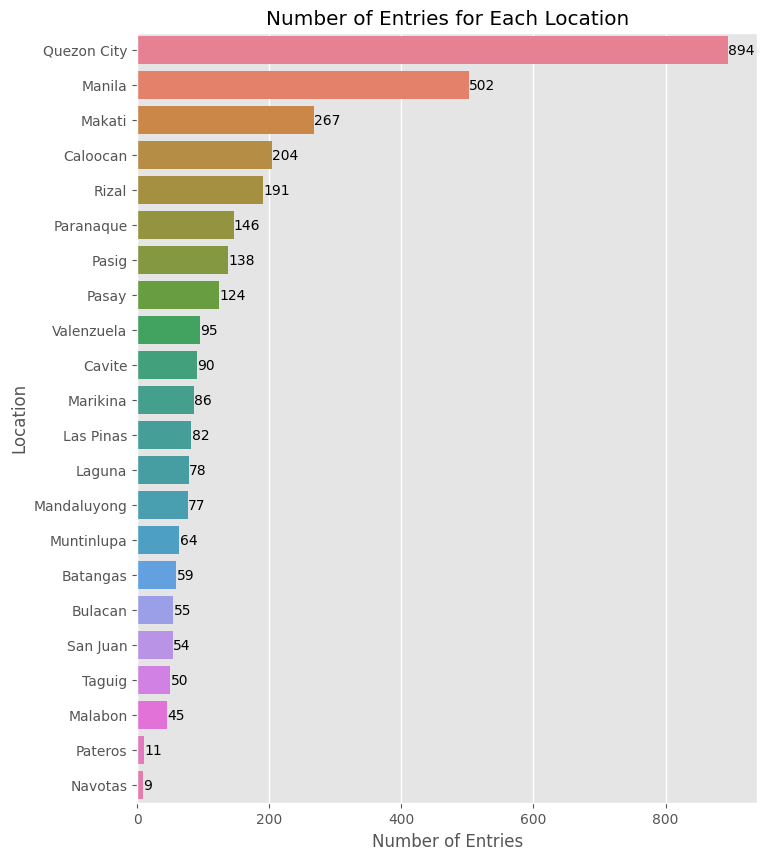

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

location_lengths = {location: len(location_dfs[location]) for location in locations}
location_lengths['Manila'] = len(location_dfs['Manila'])

sorted_location_lengths = dict(sorted(location_lengths.items(), key=lambda x: x[1], reverse=True))

total_count = sum(sorted_location_lengths.values())

plt.style.use('ggplot')
plt.figure(figsize=(8, 10))

palette = sns.color_palette("husl", len(sorted_location_lengths))

ax = sns.barplot(x=list(sorted_location_lengths.values()), 
                 y=list(sorted_location_lengths.keys()), 
                 hue=list(sorted_location_lengths.keys()),
                 palette=palette, 
                 dodge=False, 
                 legend=False)

plt.title('Number of Entries for Each Location')
plt.xlabel('Number of Entries')
plt.ylabel('Location')

for i, value in enumerate(sorted_location_lengths.values()):
    ax.text(value + 0.5, i, str(value), color='black', va='center')

print(f"Total count: {total_count}")

plt.show()

In [16]:
import os

folder_path = os.path.join(os.getcwd(), 'Google')

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for location, df_location in location_dfs.items():
    file_name = 'YellowPagesGarages' + location.replace(' ', '') + '.csv'
    
    file_path = os.path.join(folder_path, file_name)
    
    df_location.to_csv(file_path, index=False)
    
    print(f"Saved {location} to {file_path}")
    
file_path = os.path.join(folder_path, 'YellowPagesGarages.xlsx')

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    for location, df_location in location_dfs.items():
        sheet_name = 'YellowPagesGarages' + location.replace(' ', '')
        df_location.to_excel(writer, sheet_name=sheet_name, index=False)

Saved Manila to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesManila.csv
Saved Batangas to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesBatangas.csv
Saved Laguna to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesLaguna.csv
Saved Cavite to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesCavite.csv
Saved Rizal to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesRizal.csv
Saved Bulacan to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesBulacan.csv
Saved Mandaluyong to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesMandaluyong.csv
Saved Marikina to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesMarikina.csv
Saved Pasig to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesPasig.csv
Saved Quezon City to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesQuezonCity.csv
Saved San Juan to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesSanJuan.csv
Saved Caloocan to /home/eron/Notebooks/Cleaner/Google/YellowPagesGaragesCaloocan.